In [2]:

import itertools

import matplotlib
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns


def plot_cm(cm, fs, filename, xlab, ylab, title):
    cm = cm.astype('float')  # / cm.sum()  # (axis=1)[:, np.newaxis]
    matplotlib.rcParams.update({'font.size': fs})
    plt.rcParams["font.family"] = "Times New Roman"

    plt.figure(figsize=(6, 6))

    x = [2, 3, 4, 5]
    y = [2, 3, 4, 5]

    # plt.imshow(cm, cmap=plt.cm.Blues)  # interpolation='nearest', resample=False
    sns.heatmap(cm, annot=True, xticklabels=x, yticklabels=y, cmap='Blues', cbar=False)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, '{:.2f}'.format(np.round(cm[i, j] * 100, 2)),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    if title is not None:
        plt.title(title)

    plt.xticks(np.arange(cm.shape[0], dtype=int), np.arange(cm.shape[0], dtype=int))
    plt.yticks(np.arange(cm.shape[1], dtype=int), np.arange(cm.shape[1], dtype=int))
    plt.tight_layout()

    plt.ylabel(ylab)
    plt.xlabel(xlab)
    if filename is not None:
        plt.savefig(filename, bbox_inches='tight')

    plt.show()

In [3]:
df = pd.read_csv('../data/df.csv')

pf_np_y = df["gt_pf"].to_numpy()
pf_np_pred = df["Pfirrmann"].to_numpy()

pf_cm = confusion_matrix(pf_np_y, pf_np_pred)

df = df[df['gt_mc_r'].notna()]
df = df[df['UpperMarrow'].notna()]
df = df[df['gt_mc_c'].notna()]
df = df[df['LowerMarrow'].notna()]

mc_u_np_y = df["gt_mc_r"].to_numpy()
mc_u_np_pred = df["UpperMarrow"].to_numpy()

mc_l_np_y = df["gt_mc_c"].to_numpy()
mc_l_np_pred = df["LowerMarrow"].to_numpy()

mc_np_y = np.concatenate([mc_u_np_y, mc_l_np_y])
mc_np_pred = np.concatenate([mc_u_np_pred, mc_l_np_pred])


mc_cm = confusion_matrix(mc_np_y, mc_np_pred)

In [4]:
mc_cm

array([[10553,   425],
       [  715,  2143]], dtype=int64)

C:\Users\TMCSWE~1\AppData\Local\Temp/ipykernel_30540/1208586019.py:34: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  ax.show()


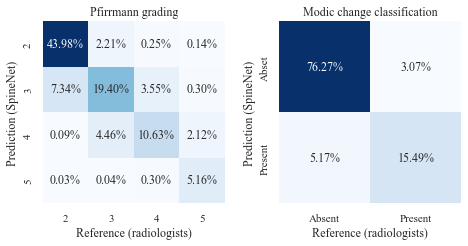

In [11]:
import matplotlib.pyplot as plt
figsize = 7.5, 3.5
ax, axes = plt.subplots(1, 2, figsize = figsize)
ax.subplots_adjust(wspace=0.3)
sns.set(font="Times New Roman")

ax1 = sns.heatmap(pf_cm/np.sum(pf_cm), annot=True,
            fmt='.2%', cmap='Blues', cbar=False, ax = axes[0])

sns.set(font="Times New Roman")
ax1.set(title="Pfirrmann grading",
      xlabel="Reference (radiologists)",
      ylabel="Prediction (SpineNet)",
      xticklabels = [2,3,4,5],
      yticklabels = [2,3,4,5])
ax1.set_aspect(aspect=1)


ax2 = sns.heatmap(mc_cm/np.sum(mc_cm), annot=True, 
                  fmt='.2%', cmap='Blues', cbar=False, ax = axes[1])
sns.set(font="Times New Roman")
ax2.set(title="Modic change classification",
      xlabel="Reference (radiologists)",
      ylabel="Prediction (SpineNet)",
      xticklabels = ['Absent', 'Present'],
      yticklabels = ['Abset', 'Present'])
ax2.set_aspect(aspect=1)


ax = ax1.get_figure()
ax = ax2.get_figure()
# ax.suptitle("Contingency tables")
ax.savefig("../figures/comfusion_matrix_dd_and_mc.svg")
ax.show()
